In [109]:
# Pandas for managing datasets
import pandas as pd
# Matplotlib for additional customization
from matplotlib import pyplot as plt
%matplotlib inline
# Seaborn for plotting and styling
import seaborn as sns 
import numpy as np

titanic = (sns.load_dataset("titanic"))

In [110]:
#     Assignment:
# 1. Import Everything you need for the lower cells and set any defaults.
# 2. Missing Data:
#     Determine how much missing data there is for each variable, plotting it as a horizontal bar plot with seaborn.
#     Determine how much missing data there is for each passenger and make a vertical bar blot according to the amount of missing data, separated by gender: 0,1,2.
# 3. Survival Exploration:
#     Create a pairplot for all numerical variables in the dataset(drop NA for age) colored by survival.
#     Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult. You pick.
#     2 Other things up to you.
# 4. Submit as another folder in your git repository. Try to include comments about what youre doing. 
    

In [111]:
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

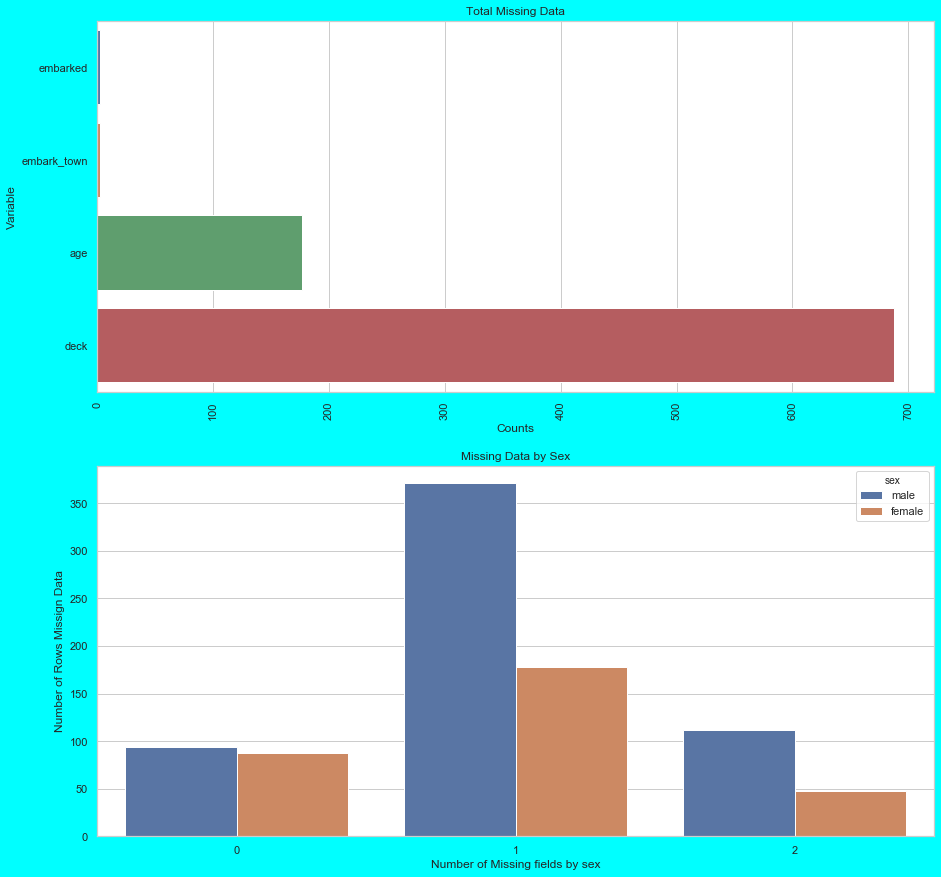

In [112]:
# 2. Missing Data:

missing_values = titanic.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values.sort_values(inplace=True)

missing_values

missing_values = missing_values.to_frame()
missing_values.columns = ['Counts']
missing_values.index.names = ['Variable']
missing_values['Variable'] = missing_values.index

fig = plt.figure(figsize=(15,15),facecolor="cyan")

ax1 = fig.add_subplot(211)
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Counts', y = 'Variable', data=missing_values).set_title("Total Missing Data")
plt.xticks(rotation = 90)

ax2 = fig.add_subplot(212)
sns.set(style="whitegrid", color_codes=True)
titanic['NumMissing'] = titanic.isnull().sum(axis=1)
missrow = titanic
sns.countplot(x = 'NumMissing', data = missrow, order=[0,1,2], hue='sex').set_title("Missing Data by Sex")
ax2.set_xlabel("Number of Missing fields by sex", fontsize=12)
ax2.set_ylabel("Number of Rows Missign Data", fontsize=12)



plt.show()


In [113]:
# titanic['NumMissing'] = titanic.isnull().sum(axis=1)
# missrow = titanic
# missrow.head

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 1080x1080 with 0 Axes>

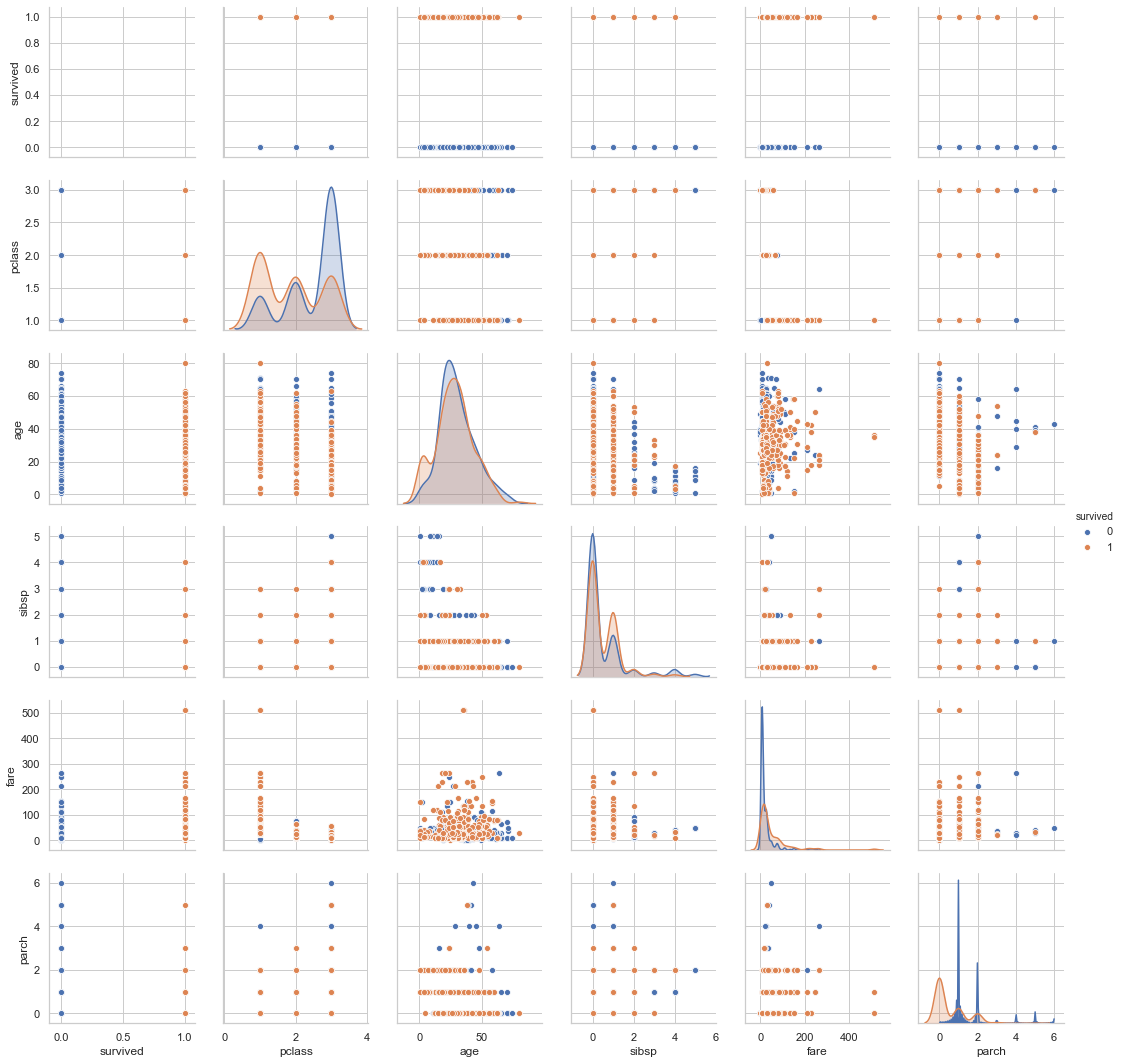

In [114]:
# 3. Survival Exploration:
#     Create a pairplot for all numerical variables in the dataset(drop NA for age) colored by survival.
#     Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult. You pick.
#     2 Other things up to you.


titanic2 = titanic[pd.notnull(titanic['age'])]
titanic3 = titanic2[['survived', 'pclass', 'age','sibsp','fare','parch']]
fig = plt.figure(figsize=(15,15))
sns.pairplot(titanic3, hue='survived')
plt.show

#titanic3.head()


C:\Users\Corey\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


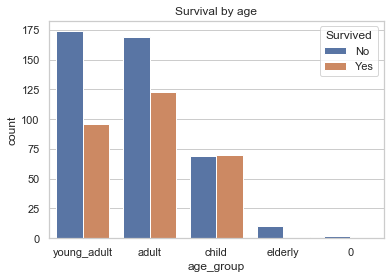

In [115]:
# 3. Survival Exploration:
#     Create a pairplot for all numerical variables in the dataset(drop NA for age) colored by survival.
#     Where age is not null, create a bar plot of survival and age grouping according to defined ranges of age for child, younger adult, adult, older adult. You pick.
#     2 Other things up to you.

cats = [titanic2.age.between(-1,18), titanic2.age.between(19,30),titanic2.age.between(31,64),titanic2.age.between(65,100)]

choices = ['child','young_adult','adult','elderly']

titanic2['age_group'] = np.select(cats,choices)



sns.countplot(x = 'age_group', data = titanic2, hue='survived').set_title("Survival by age")
ax2.set_xlabel("Ages", fontsize=12)
ax2.set_ylabel("Number of Survived", fontsize=12)
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
# Change survived legend



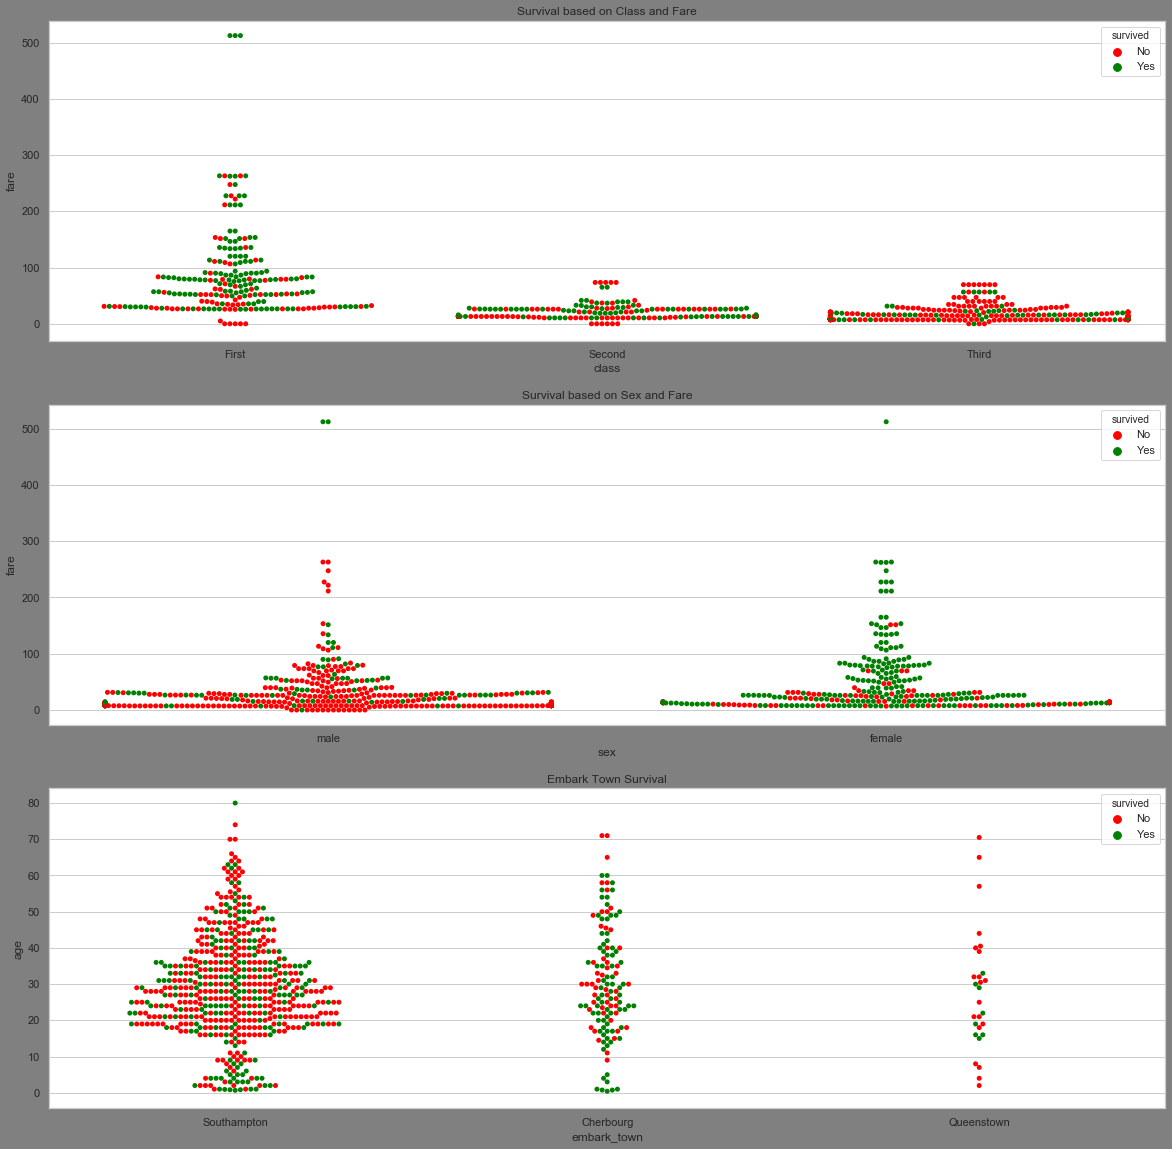

In [118]:
titanic.loc[:,'survived'].replace([0,1],['No','Yes'],inplace=True)

fig4 = plt.figure(figsize=(20,20),facecolor="grey")

axA = fig4.add_subplot(311)
sns.set(style="whitegrid", color_codes=True)
sns.swarmplot(x='class', y='fare',hue='survived',palette=['red','green'],data=titanic)
plt.title('Survival based on Class and Fare')
#plt.legend(title='Survival: 0s perished, 1s survived', loc='upper right')
#plt.legend(labels=['No','Yes'])
#Adding this legend turns yes and no blue?

axB = fig4.add_subplot(312)
sns.set(style="whitegrid", color_codes=True)
sns.swarmplot(x='sex', y='fare',hue='survived',palette=['red','green'],data=titanic)
plt.title('Survival based on Sex and Fare')
#plt.legend(title='Survival: 0s perished, 1s survived', loc='upper right')


axC = fig4.add_subplot(313)
sns.set(style="whitegrid", color_codes=True)
sns.swarmplot(x='embark_town', y='age',hue='survived',palette=['red','green'],data=titanic)
plt.title('Embark Town Survival')
#plt.legend(title='Survival: 0s perished, 1s survived', loc='upper right')


plt.show()


In [ ]:
fig5= plt.figure(figsize=(20,20),facecolor="white")
sns.set(style="whitegrid", color_codes=True)
